In [1]:
import pandas, numpy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# 0. user-defined variables

In [4]:
input_file = '/Users/adrian/research/akureyri/results/sleuth_pipeline/sleuth_tpm_bygene.tsv'

# 1. read expression

In [5]:
expression = pandas.read_csv(input_file, sep='\t', index_col=0)
print(expression.shape)
expression

(39400, 12)


,test01,test02,test03,test04,test05,test06,test07,test08,test09,test10,test11,test12
ENSG00000000003,12.664839,13.473455,14.804207,13.129586,14.858394,14.304390,13.460249,10.924413,14.561169,15.495081,14.883931,12.875695
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,122.763718,100.281756,137.203855,101.142393,133.774439,93.060988,128.126615,89.876178,122.842329,92.685267,96.257434,107.932318
ENSG00000000457,3.678197,5.132262,4.419648,3.199299,2.645469,4.642247,4.314534,4.197339,4.294478,4.861337,4.538835,3.866391
ENSG00000000460,15.634118,9.632738,13.780579,17.035585,12.617664,7.780771,11.425748,20.723722,17.836973,8.678016,18.850360,17.568865
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000293548,0.036915,0.019507,0.113815,0.000000,0.000000,0.032668,0.109423,0.124573,0.070059,0.180228,0.050396,0.000000
ENSG00000293550,0.032465,0.005283,0.027902,0.013153,0.026800,0.013527,0.010559,0.000000,0.048945,0.035985,0.027196,0.026230
ENSG00000293553,0.000000,0.312618,0.000000,0.093341,0.000000,0.000000,0.029877,0.000000,0.000000,0.230861,0.000000,0.000000
ENSG00000293563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 3. filter and transform

In [6]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100]

print(substantial_expression.shape)
print(high_expression.shape)

(14638, 12)
(2491, 12)


In [7]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1)

# 4. visualize substantial expression

In [8]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.28786924 0.22877306]


In [9]:
# 2D circles
# 3D squares
# blue t2, gold t14

my_colors = ['skyblue', 'skyblue', 'gold', 'gold']*3
my_markers = ['o', 's']*6

legend_elements = [

    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white', alpha=2/3)
]

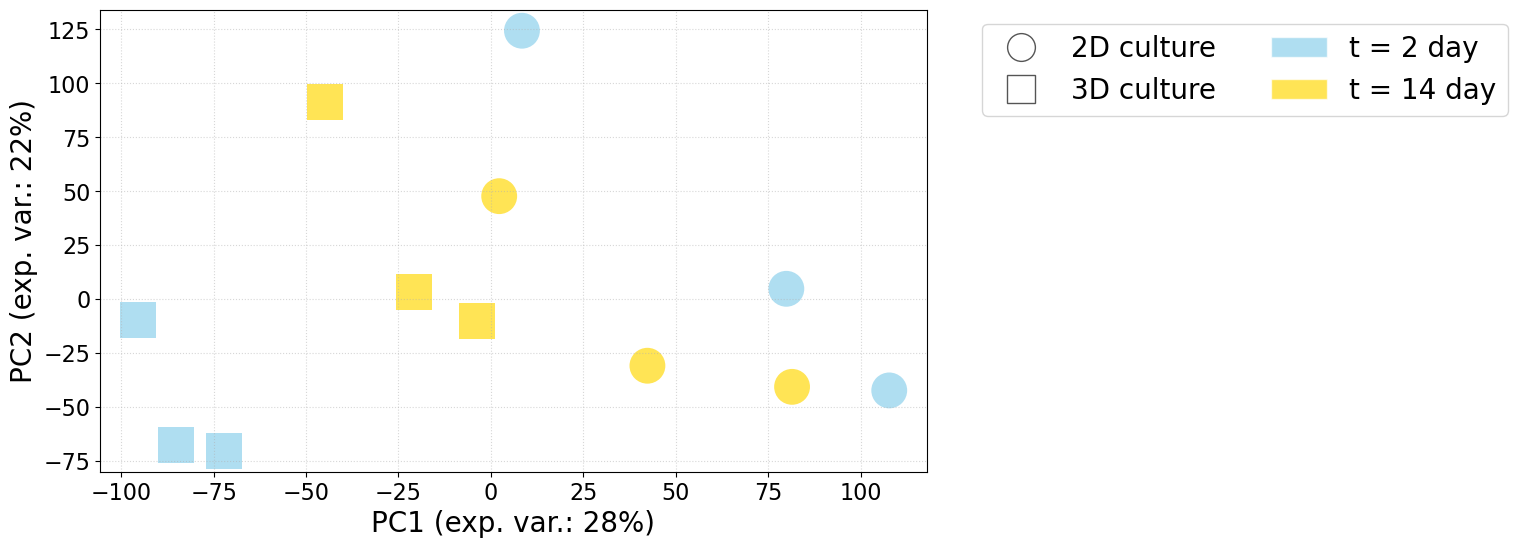

In [10]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')

matplotlib.pyplot.legend(legend_elements, ['2D culture', '3D culture', 't = 2 day', 't = 14 day'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

matplotlib.pyplot.show()

# 4. visualize high expression

In [11]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_high_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.40899276 0.23682658]


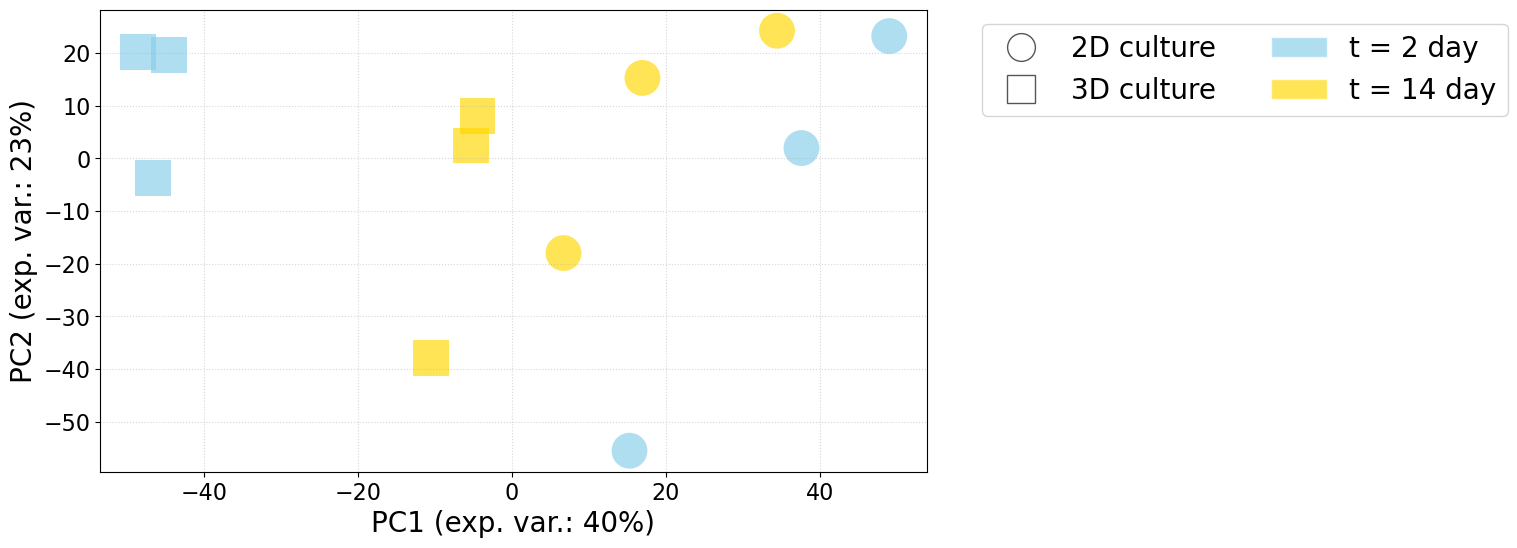

In [13]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')
    
matplotlib.pyplot.legend(legend_elements, ['2D culture', '3D culture', 't = 2 day', 't = 14 day'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('pca.svg')